# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

In [6]:
!pip install gdown==4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


Скачиваем данные для работы:

In [7]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 194MB/s]


Начнем с необходимых приготовлений.

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [9]:

coins = pd.read_csv('/content/coins.csv', index_col='date')

Посмотрим что получилось

In [ ]:
coins.head(24)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07
2013-04-30,144.00,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.00,146.93,134.05,139.00,0.0,1.597780e+09
2013-04-30,4.40,9099.0,4.039166e+07,17810.0,LTC,Litecoin,4.40,4.57,4.17,4.30,0.0,7.572680e+07
2013-05-01,139.00,55176.0,1.206825e+08,83564.0,BTC,Bitcoin,139.00,139.89,107.72,116.99,0.0,1.542820e+09
2013-05-01,4.29,8990.0,7.637420e+07,16991.0,LTC,Litecoin,4.29,4.36,3.52,3.80,0.0,7.390120e+07
2013-05-02,116.38,55295.0,9.337533e+07,81920.0,BTC,Bitcoin,116.38,125.60,92.28,105.21,0.0,1.292190e+09


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [ ]:
m = len(pd.unique(coins['name']))
print(m)

70


### 2. За какой период данные мы имеем? (0.4 балла)

In [ ]:
max_date = coins.index.max()
min_date = coins.index.min()
print("From: ", min_date, " To: ", max_date)

From:  2013-04-28  To:  2018-06-06


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [ ]:
coins.isnull().sum()

price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

Пропуски вызваны отсутствием транзакций в определенные дни.

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [ ]:
max_price = coins['high'].max()
max_high = coins['high'] == max_price
name =  list(coins['name'][max_high].values)
date = list(coins.index[max_high].values)
print("Монета: ", name[0], "\nДата: ", date[0] )

Монета:  Bitcoin 
Дата:  2017-12-17


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

Самая низкая средняя капитализация:  KingN Coin
Самая высокая средняя капитализация:  Bitcoin


<Axes: ylabel='market'>

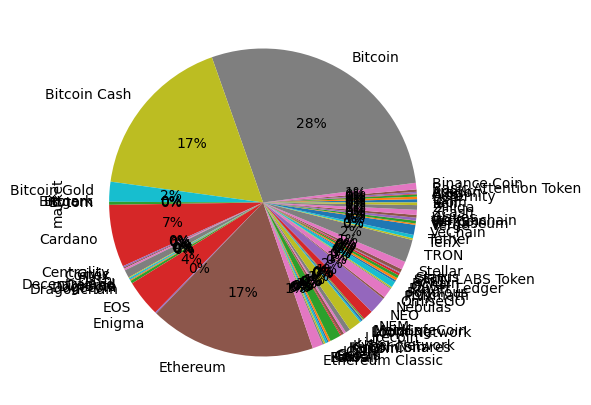

In [ ]:
new_coins = coins.groupby(['name'])
new_mean_coins = new_coins['market'].mean()


print("Самая низкая средняя капитализация: ", new_mean_coins.idxmin() )
print("Самая высокая средняя капитализация: ", new_mean_coins.idxmax())


new_mean_coins.plot(kind='pie', y='mean', autopct='%1.0f%%', figsize=(15,5) )


## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [ ]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    data = coins.loc[(coins['symbol'] == symbol), ['open', 'close', 'high', 'low']]
    data = data.loc[start_date:end_date]

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    ax.plot(data.index, data.open, color='green', label='Цена начала продаж')
    ax.plot(data.index, data.close, color='red', label='Цена конца продаж')
    ax.plot(data.index, data.high, color='orange', label='Максимальная цена за день')
    ax.plot(data.index, data.low, color='blue', label='Минимальная цена за день')

    plt.xlabel('Дата', fontsize = 20)
    plt.xticks(data.index.values[0::data.shape[0] // 10])
    plt.ylabel('Цена', fontsize = 20)
    plt.title('Изменение цен валюты за выбранный диапазон')
    plt.grid(True)
    plt.legend()

    plt.show()

Посмотрим, что получилось:

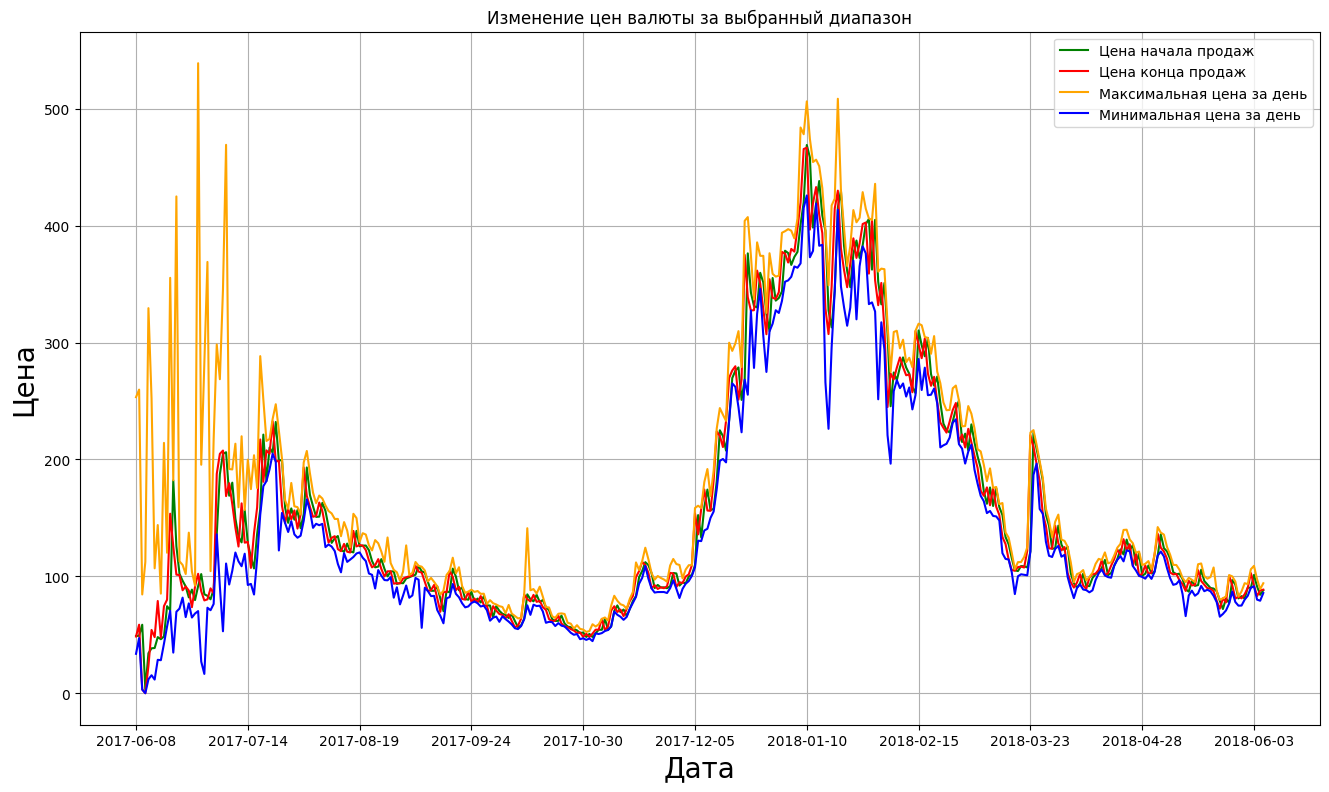

In [ ]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [ ]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    data = coins.loc[coins['symbol'] == symbol]
    data = data.loc[start_date:end_date]
    max_del = data[['open', 'close']].max(axis = 1)
    pnd = data['high']/max_del
    return pnd.idxmax(), pnd.max()

In [ ]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

('2017-11-29', 1.1428940004366206)

Сравните эти значения для разных монет:

In [ ]:
for coin in set(coins['symbol']):
    result = find_most_severe_pump_and_dump(coins, symbol=coin, start_date='2017-06-01', end_date='2018-06-01')
    print(f'Для {coin}: ', result)

Для WAVES:  ('2017-06-03', 1.2543352601156068)
Для POWR:  ('2017-11-02', 1.3641688298886077)
Для XVG:  ('2017-12-17', 1.726864726979804)
Для MANA:  ('2017-09-21', 2.9702777900454884)
Для LOOM:  ('2018-03-14', 1.5265126623868979)
Для FUN:  ('2017-06-29', 12.490562327959102)
Для MTL:  ('2017-11-20', 1.6728538283062646)
Для ELF:  ('2018-01-05', 1.2808988764044942)
Для SRN:  ('2017-12-30', 1.8916487255607852)
Для ETH:  ('2017-07-18', 1.1433508255471652)
Для GNO:  ('2018-03-25', 1.653659748974773)
Для DOGE:  ('2017-12-17', 1.2747326203208558)
Для USDT:  ('2017-11-12', 1.099009900990099)
Для TRX:  ('2017-09-16', 9.651010376843255)
Для ZIL:  ('2018-03-05', 1.4631857737419598)
Для ICN:  ('2017-12-07', 2.586337382991436)
Для EOS:  ('2017-07-03', 1.3202933985330074)
Для CVC:  ('2017-12-25', 1.726167450721039)
Для VEN:  ('2017-12-27', 1.2713567839195978)
Для QASH:  ('2017-11-23', 1.6658378856041132)
Для ZEC:  ('2017-09-28', 1.3298776561493881)
Для BAT:  ('2017-06-04', 1.2342492522991364)
Для WTC:

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [ ]:
def compute_roi(coins, investments, start_date, end_date):
    start_price = sum(investments.values())
    start = coins.loc[start_date]
    end = coins.loc[end_date]
    end_price = 0
    for coin in investments.keys():
      pr_st = start['price'][start['symbol'] == coin]
      count = investments[coin]/pr_st[0]
      pr_en = end['price'][end['symbol'] == coin]
      end_price += pr_en[0]*count
    return (end_price - start_price)/start_price

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [ ]:
def plot_bollinger_bands(coins, symbol, window, width):
  data = coins.loc[coins.symbol == symbol]
  mean = data['price'].rolling(window=window).mean()
  std = data['price'].rolling(window=window).std()
  up_bound = mean + width*std
  lowp_bound = mean - width*std
  fig = plt.figure(figsize=(16, 9))
  ax = fig.add_subplot(111)
  ax.plot(data.index, data['price'], color='green', label='Цена')
  ax.plot(data.index, mean, color='red', label='Скользящее среднее')
  ax.plot(data.index, up_bound, color='orange', label='Верхняя граница Боллинджера')
  ax.plot(data.index, lowp_bound, color='blue', label='Нижняя граница Боллинджера')

  plt.xlabel('Дата', fontsize = 20)
  plt.xticks(data.index.values[0::data.shape[0] // 10])
  plt.ylabel('Цена', fontsize = 20)
  plt.title('Границы Боллинджера')
  plt.grid(True)
  plt.legend()

  plt.show()




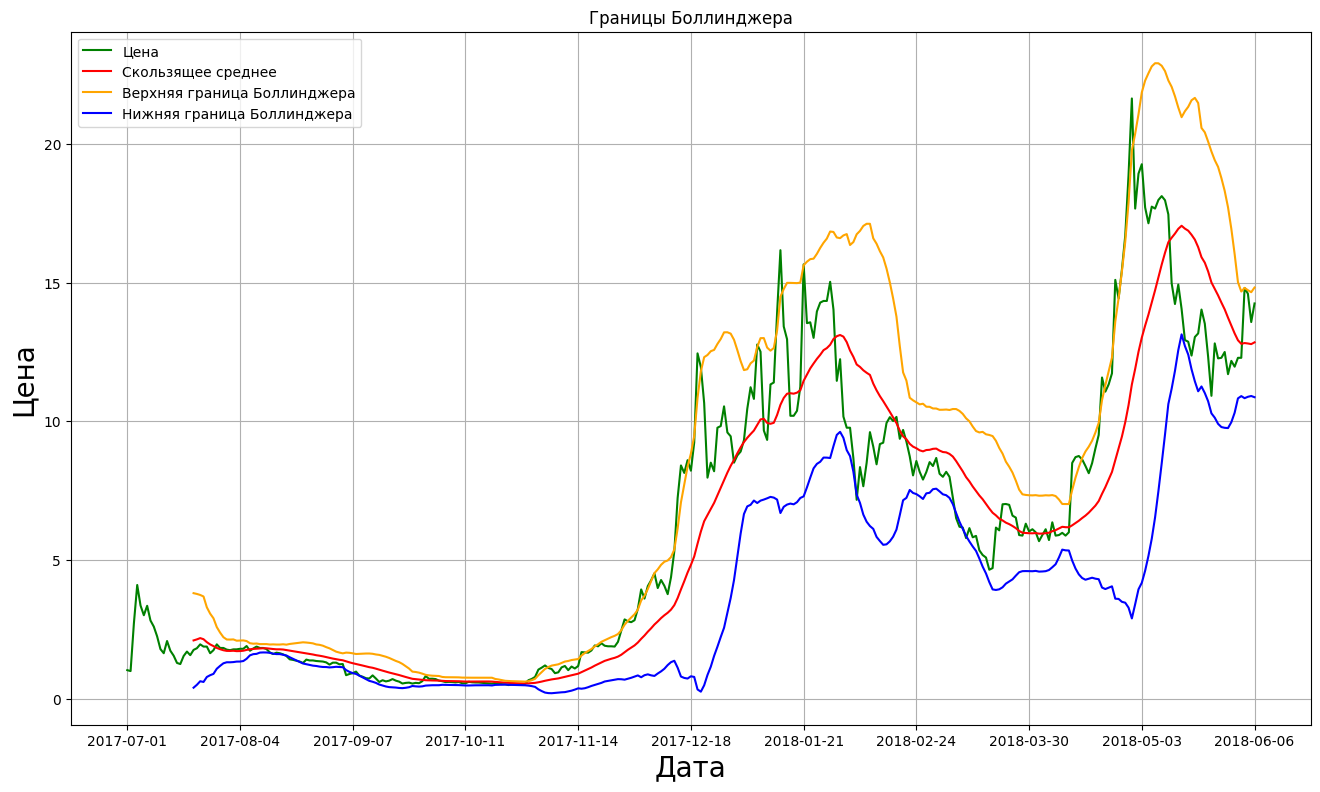

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

[Текст ссылки](https://)**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

В большей части графика правило выполнялось. Особенно хорошо прослеживается для нижней границы. Для верхнй границы существуют пики, которые не отражались сразу, а чуть выходили за её пределы.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [ ]:
from textwrap import indent
def plot_coins_capitalizations(coins, symbols, start_date):
      fig = plt.figure(figsize=(16, 9))
      ax = fig.add_subplot(111)
      for symbol in symbols:
        market_data = coins.loc[(coins['symbol'] == symbol), ['market']]
        market_data = market_data.loc[start_date:]
        ax.plot(market_data.index, market_data, label = symbol)
      plt.xlabel('Дата', fontsize = 20)
      plt.xticks(market_data.index.values[0::market_data.shape[0] // 10])
      plt.ylabel('Капитализация', fontsize = 20)
      plt.title('Общая капитализация')
      plt.grid(True)
      plt.legend()

      plt.show()

      fig = plt.figure(figsize=(16, 9))
      ax = fig.add_subplot(111)
      sum = coins.groupby(coins.index)['market'].sum()
      sum = sum[start_date:]
      sum = pd.DataFrame(data=sum.values, columns=['market'], index=sum.index)
      for symbol in symbols:
        market_data = coins.loc[(coins['symbol'] == symbol), ['market']]
        market_data = market_data.loc[start_date:]
        percent = market_data/sum
        ax.plot(percent.index, percent, label = symbol)
      plt.xlabel('Дата', fontsize = 20)
      plt.xticks(market_data.index.values[0::market_data.shape[0] // 10])
      plt.ylabel('Доля', fontsize = 20)
      plt.title('Доля капитализации')
      plt.grid(True)
      plt.legend()

      plt.show()




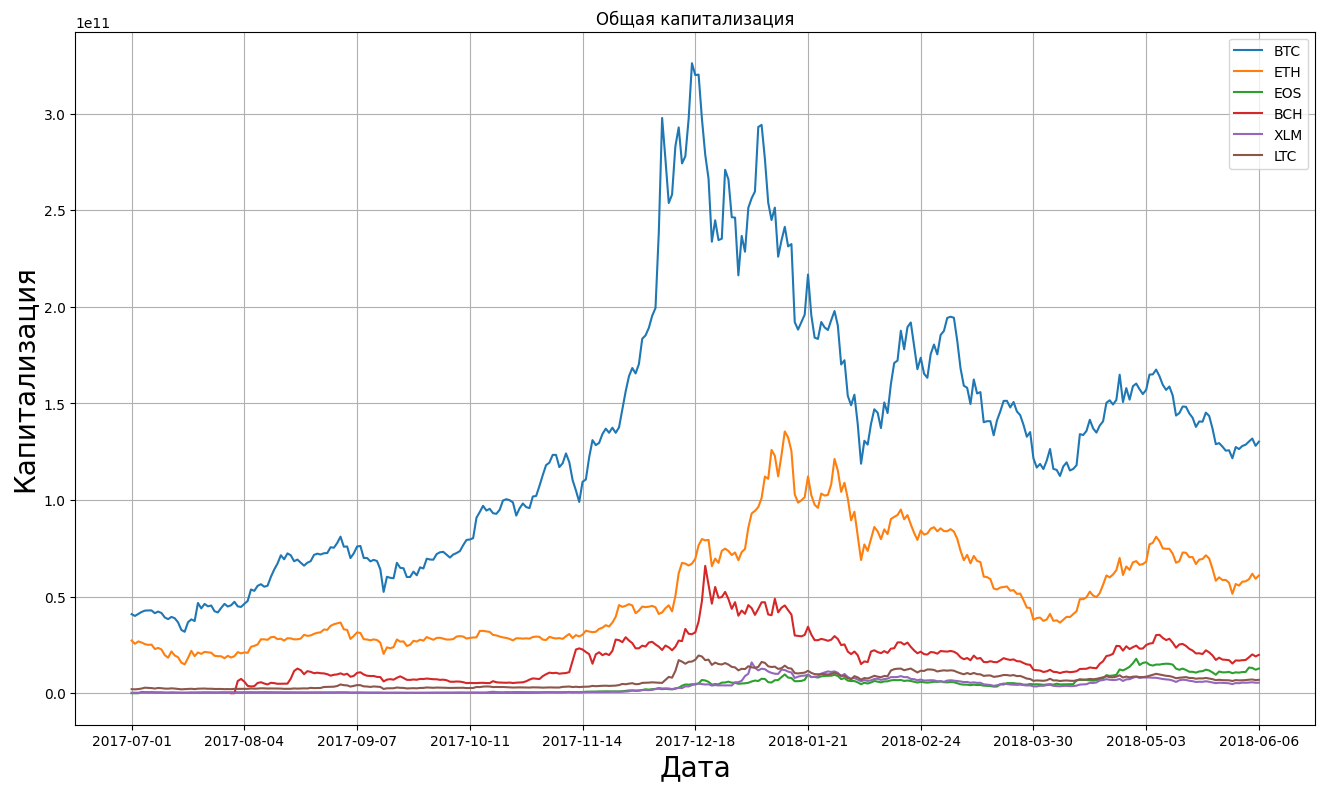

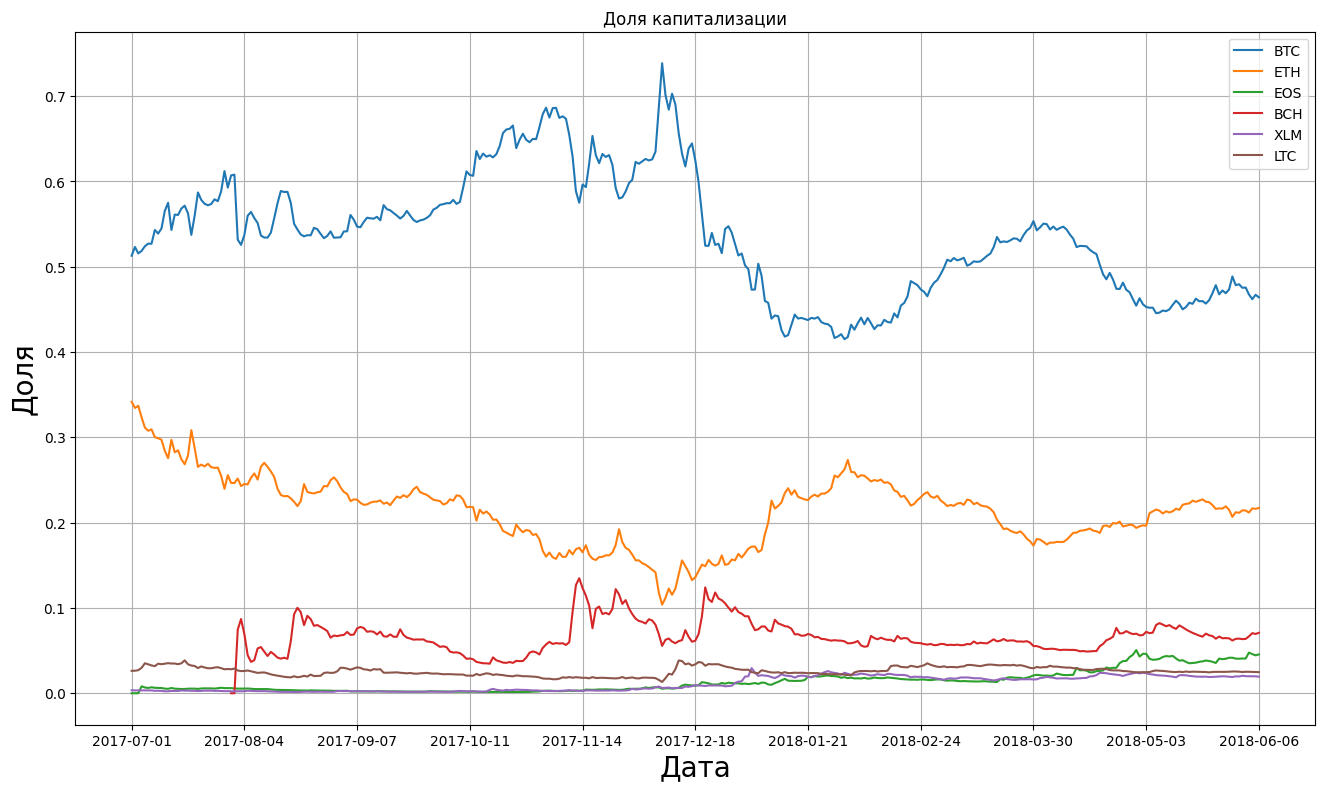

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?



Доля капитализации альткойнов сильно зависит от капитализации биткойна, потому что он имеет самый большой вклад в общую капитализацию. Поэтому, если капитализация биткойна резко растет, то доля капитализаций альткойнов падает, даже если само значение капитализации не меняется или даже растет (но не так сильно, как у биткойна). Аналогично с падением: если капитализация биткойна падает, то доля альткойнов растет, хотя при этом абсолютное значение капитализации может тоже падать или оставаться неизменным.

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [36]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
      sum = coins.groupby(coins.index)['market'].sum()
      percent = pd.DataFrame(columns=['frac', 'symbol'], index=coins.index)
      for index, row in coins.iterrows():
          percent.loc[index, 'frac'] = coins.loc[index, 'market']/sum[index]
          percent.loc[index, 'symbol'] = coins.loc[index, 'symbol']

      corr_df = pd.DataFrame(index = coins.index.unique().tolist(), columns = symbols)
      for symbol in symbols:
        num_date = percent.loc[(percent['symbol'] == symbol)].index.get_loc(date)
        values = percent.loc[(percent['symbol'] == symbol), ['frac']].iloc[num_date - window:num_date]
        corr_df[symbol] = values.ewm(alpha = alpha).mean()

      return corr_df.dropna().corr()

In [37]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-37-5cb301b2dfa8>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,-0.96,0.92,-0.94,-0.42,0.36,-0.87
ETH,-0.96,1.00,-0.92,0.83,0.18,-0.38,0.77
EOS,0.92,-0.92,1.00,-0.89,-0.38,0.30,-0.75
BCH,-0.94,0.83,-0.89,1.00,0.67,-0.27,0.90
XLM,-0.42,0.18,-0.38,0.67,1.00,0.17,0.64
LTC,0.36,-0.38,0.30,-0.27,0.17,1.00,-0.14
ADA,-0.87,0.77,-0.75,0.90,0.64,-0.14,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [38]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-38-c2d058096282>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,-0.94,-0.96,-0.90,-0.93,-0.75,-0.95
ETH,-0.94,1.00,0.91,0.77,0.81,0.78,0.85
EOS,-0.96,0.91,1.00,0.78,0.95,0.84,0.98
BCH,-0.90,0.77,0.78,1.00,0.83,0.41,0.81
XLM,-0.93,0.81,0.95,0.83,1.00,0.68,0.97
LTC,-0.75,0.78,0.84,0.41,0.68,1.00,0.79
ADA,-0.95,0.85,0.98,0.81,0.97,0.79,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

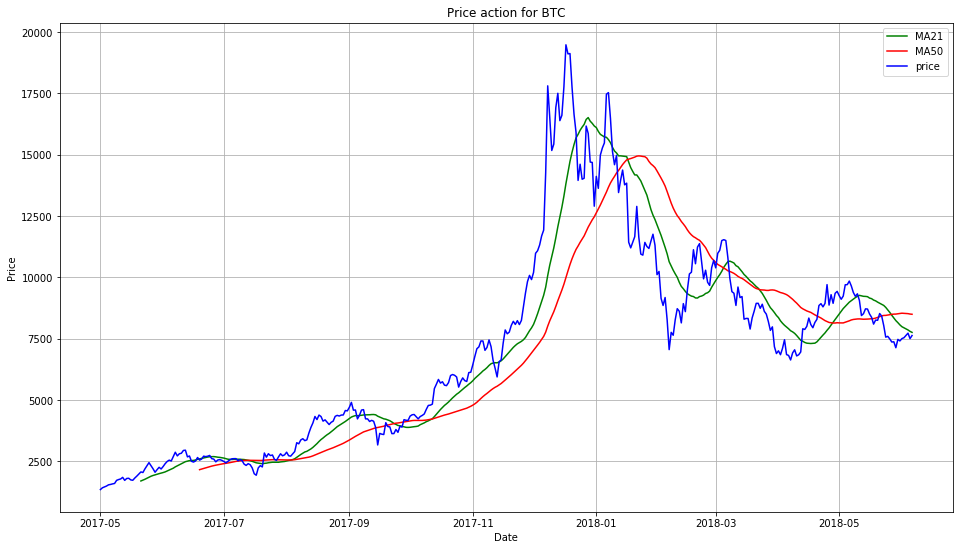

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.